# Stock Prediction Web-App

## Project Definition  
### Implementing a stock prediction app to predict future stock prices from past historic data 

#### Data source:
Quandl

#### Model: 
SARIMA (Seasonal Autoregressive Integrated Moving Average) time series forecasting model

#### Objective:
- Implement SARIMA time series Forecasting model
- Deployment through a web app with an interface that accepts a date range and the company ticker(company symbols) for which it trains on, and ouputs a model of the predictive behaviour of the stocks and 
- it also accepts dates after the range trained on and outputs the predicted price of the stocks for the selected ticker symbol

#### Evaluation
Model would be evaluated by comparing the trend for predicted price and the actual price
    

In [1]:
#import the necessary libraries
import requests
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from pandas.tseries.offsets import DateOffset

In [2]:
#Extract data from Quandl api for a given time period

stock_symbol = "WIKI/AMZN"
start = datetime(2017, 1, 1)

end = datetime(2017, 12, 31)
df = quandl.get(stock_symbol, start_date = start, end_date = end, api_key = 'BGfHN3v7ohSf6qitcmF2')

training_set = df.iloc[:,3] # the closing prices for the stocks were discretionarily were used for the analysis and prediction

In [3]:
#Restructure the data
training_set = pd.DataFrame(training_set)
training_set.reset_index(inplace = True)

In [4]:
#Explore the presence of null in the data
training_set.isnull().sum()

Date     0
Close    0
dtype: int64

In [5]:
#get the stats of the data
training_set.describe()

,Close
count,249.000000
mean,967.403996
std,106.480899
min,753.670000
25%,886.540000
50%,967.800000
75%,1002.940000
max,1195.830000


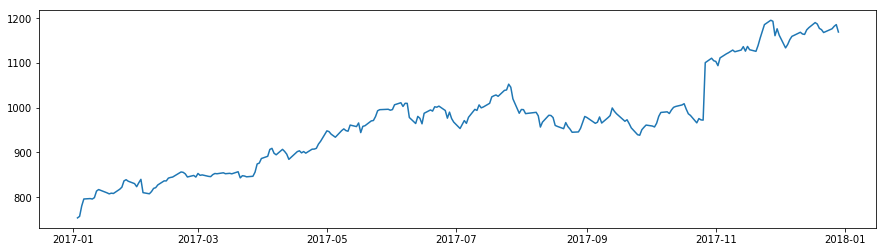

In [6]:
#Explore the trend in the data
plt.figure(figsize = (15, 4))
plt.plot(training_set['Date'], training_set['Close'])
plt.show()

##### Implementing The SARIMA model

In [7]:
# method for defining model parameters
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\Tomiwa_Salau\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


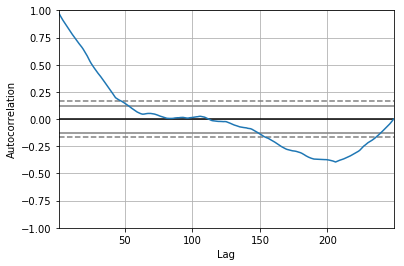

In [8]:
#autocorrelation coeefficient to determine the p in the parameters
autocorrelation_plot(training_set['Close'])

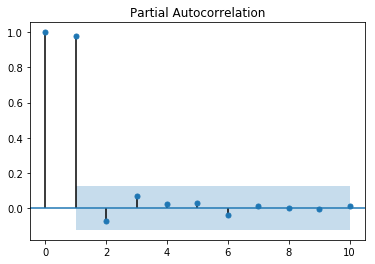

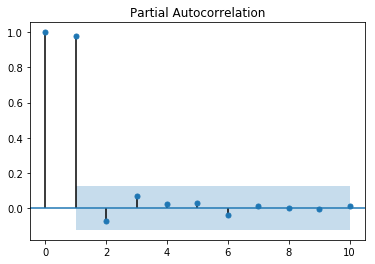

In [9]:
# partial correlation coefficient used to determine the parameter q
plot_pacf(training_set['Close'], lags = 10)

In [10]:
#implement SARIMA model
model = SARIMAX(training_set['Close'],order=(0,0,1),#(p,d,q)
                        trend='n',
                        seasonal_order=(1,1,1,12))
results = model.fit()

SARIMAX takes in the training data and its defining parameters. The 'order' parameter is particularly defining for the model as it influences the understanding of the data in making use of coeficients to predict the outcome; The autocorrelation coeffiecient (p), the difference (d), the pacf coefficient(q). Using the plot above to get the values of this coefficient woud serve as a base for which trials on suitable value is essential to getting the right fit for the model.

##### Model Evaluation

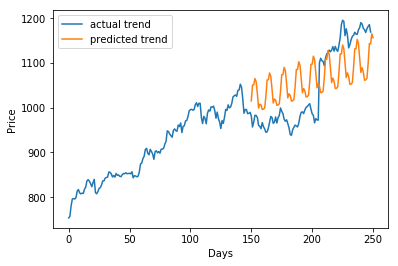

In [11]:

#output period for test prediction
start = 150
end = 250
output = results.predict(start=start,end=end,dynamic=True)

#Evaluate model proficiency
plt.plot(training_set['Close'].values, label = 'actual trend')
plt.plot(output, label = 'predicted trend')#training_set['forecast'].values)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()



On evaluation, the SARIMA model was able to predict the general trend of the stock prices as we can see an upward trend which is also in tandem with the actual prices, though it does not adequately capture the dips and highs of the stock trend which might be due to some environmental variables but it gives a relatively good prediction on an average for each time points.

##### Make Predction for a new Date


In [12]:
#Predict stock price for Jan 01, 2019

predict_date = "2019-01-01"

In [13]:
# data to be predicted - last date in training set
pred_date = datetime.strptime(predict_date, '%Y-%m-%d')
diff = pred_date - training_set['Date'].iloc[-1]
span = diff.days +1

# create new dates for predictions

future_date = [training_set['Date'].iloc[-1] + DateOffset(days = i) for i in range(0, span)]

future_date_df1 = pd.DataFrame(future_date, columns = ["Date"])[1:]#.set_index('Date')

future_date_df1.head()

,Date
1,2017-12-30
2,2017-12-31
3,2018-01-01
4,2018-01-02
5,2018-01-03


In [14]:
#Model makes prediction for the new dates
future_date_df2 = pd.DataFrame(results.predict(start = 250, end = 614, dynamic= True).values)
future_date_df2.columns = ['Forecast']
future_date_df2.head()

C:\Users\Tomiwa_Salau\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


,Forecast
0,1187.664485
1,1193.040226
2,1205.951988
3,1202.534559
4,1191.613616


In [15]:
# join new dates and their forecast price
df = future_date_df1.join(future_date_df2)
df.head()

,Date,Forecast
1,2017-12-30,1193.040226
2,2017-12-31,1205.951988
3,2018-01-01,1202.534559
4,2018-01-02,1191.613616
5,2018-01-03,1188.110421


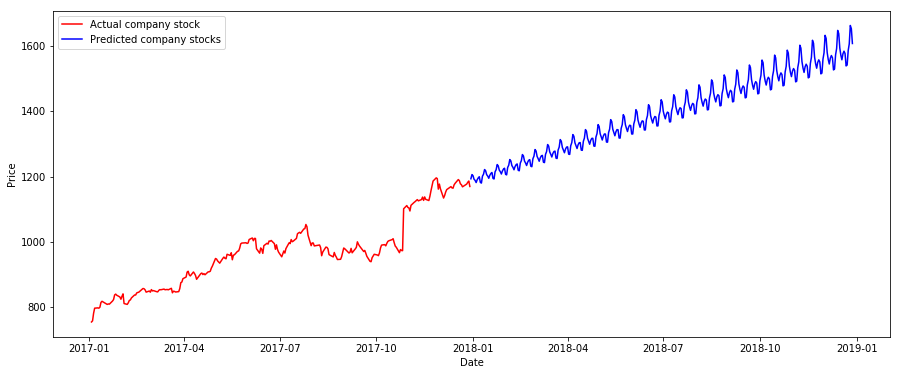

In [16]:
#stock price plot showing the actual trend and the predicted trend over the required period of time
plt.figure(figsize=(15,6))
plt.plot(training_set['Date'], training_set['Close'], color = 'red', label = 'Actual company stock')
plt.plot(df['Date'], df['Forecast'], color= 'blue', label = 'Predicted company stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Conclusion

   This essence of this project is basically to develop a stock prediction app which can analyst can use to forecast the stock prices of comapnaies at a prefered date.
   
   It involved a web app using a machine learning model called SARIMA, the advanced version of ARIMA, an Autoregressive Integrated Moving Average model which considers the seasons characteristics, to predict the stock prices using data of previous stock prices over a period of time. SARIMA model for time series problem utilizing moving average between series of data values  to get the succeeding values was implemened, defining parameters p, d, q obtained and accuracy evaluated.
    
   A deployment medium, A web app, developed using Flask, javascript, HTML, CSS and python to make the model accessible to the user.
    

Overall , it was enjoyable as well as challenging cause I started out using LSTM for my model but encountered some time consuming challenges in implementation, SARIMAX proved to be an easy implementation with near degree accuracy but regardless, i would resolve to implement LSTM in coming projects

#### Model Improvement

This model can be improved to cater for a multivariate situation where more than variable is considered to make prediction for the future stock value